<a href="https://colab.research.google.com/github/BAravind-5/Task_11/blob/main/Task11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

X.shape, y.shape

((569, 30), (569,))

In [2]:
pd.Series(y).value_counts()

,count
1,357
0,212


In [3]:
X.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.98100,11.70000,13.37000,15.7800,28.1100
mean texture,569.0,19.289649,4.301036,9.71000,16.17000,18.84000,21.8000,39.2800
mean perimeter,569.0,91.969033,24.298981,43.79000,75.17000,86.24000,104.1000,188.5000
mean area,569.0,654.889104,351.914129,143.50000,420.30000,551.10000,782.7000,2501.0000
mean smoothness,569.0,0.096360,0.014064,0.05263,0.08637,0.09587,0.1053,0.1634


The dataset contains numerical features computed from breast mass images.
The target variable indicates whether a tumor is malignant or benign.

In [4]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

SVM is distance-based, so feature scaling is required to ensure
all features contribute equally.

In [ ]:

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_linear = SVC(kernel='linear', probability=True)
svm_linear.fit(X_train_scaled, y_train)

y_pred_linear = svm_linear.predict(X_test_scaled)
accuracy_score(y_test, y_pred_linear)

In [8]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_rbf = SVC(kernel='rbf', probability=True)
svm_rbf.fit(X_train_scaled, y_train)

y_pred_rbf = svm_rbf.predict(X_test_scaled)
accuracy_score(y_test, y_pred_rbf)

0.9824561403508771

RBF kernel can model non-linear decision boundaries better than
linear kernel when data is not linearly separable.

In [9]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1]
}

grid = GridSearchCV(
    SVC(kernel='rbf', probability=True),
    param_grid,
    cv=5,
    scoring='accuracy'
)

grid.fit(X_train_scaled, y_train)

grid.best_params_, grid.best_score_

({'C': 10, 'gamma': 0.01}, np.float64(0.9802197802197803))

In [10]:
best_model = grid.best_estimator_

y_pred_best = best_model.predict(X_test_scaled)

In [11]:
from sklearn.metrics import classification_report, confusion_matrix

classification_report(y_test, y_pred_best)

'              precision    recall  f1-score   support\n\n           0       0.98      0.98      0.98        42\n           1       0.99      0.99      0.99        72\n\n    accuracy                           0.98       114\n   macro avg       0.98      0.98      0.98       114\nweighted avg       0.98      0.98      0.98       114\n'

In [12]:
confusion_matrix(y_test, y_pred_best)

array([[41,  1],
       [ 1, 71]])

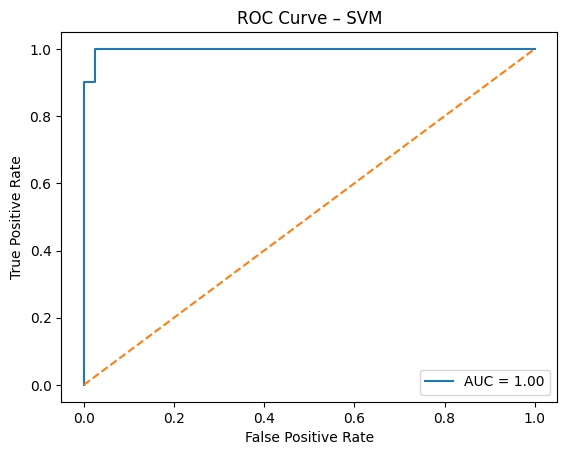

np.float64(0.9976851851851851)

In [13]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob = best_model.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – SVM")
plt.legend()
plt.show()

auc_score

In [14]:
import joblib
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', best_model)
])

joblib.dump(pipeline, "svm_breast_cancer_model.pkl")

['svm_breast_cancer_model.pkl']